

# Copper mine problem

@author: coding: Ivan Lokmer, problem: Tom Manzzocchi, Ivan Lokmer

A mining company has drilled 598 boreholes on a regular grid in a 13 km by 46 km
area whilst prospecting for copper. In each borehole, the company have measured:
(i) The thickness of the copper-bearing rock formation (in metres)
(ii) The average copper concentration of this rock formation, 
     in parts per million by volume (ppm).
     
### Tasks:
1. Calculate the total amount of the copper in the entire area (give your answer
    to the nearest tonne). The density of copper is 8960 kg/m3.
2. The company wants to put a 3 km by 3 km mine in the area. Find the X and Y
   locations of the centre of this mine, for the mine location that will contain
   the most copper. 
3. Plot the distribution of Cu mass in the investigated area to visually inspect 
   your result for the best placement of the mine
   
   
   

***Note 1:*** *Assume that measurements in 598 wells are representative for the whole  investigated area of 598 km2 (13km x 46km), i.e. that the measurements in each well are representative for the area of 1km2. Nnote that this is a very crude assumption; the correct way would be to interpolate the thickness and  concentration values between the wells using kriging, linear interpolation, spline interpolation  or some other suitable method)*
 
***Note 2:*** *Python libraries required for this exercise are:*
 * ***pandas*** *- data analysis and manipulation tool*
 * ***numpy (numerical python)***  *- library  for working with arrays, matrices, linear algebra etc.*  
 * ***matplotlib*** *- a comprehensive library for creating static, animated, and interactive visualizations in Python*
 
***Note 3:*** *Jupyter notebooks are a great way to share your research, coursework, write a report etc. However, the best way for the ongoing research is to write your code in scripts (files of the type <file.py>). In the end of this exercise, you will be given the solution to this problem as a Jupyter Notebook, but also as a script "CopperMine_exercise.py".* 

A good web resource for python beginners can be found at <a href="https://www.w3schools.com/python/" target="_blank">this link.</a> 
 
 
 
 ### Reading the data
 The data measurements are given in csv (comma-separated values) file as "Well X location (km), Well Y location (km),
Thickness (m), Concentration (ppm)". The file is hosted on Gdrive at the following link: https://drive.google.com/file/d/1SGhQMRjWKc2F57FBeb4rXv16T7xUvMS4/view?usp=sharing. Download the file and inspect it visually using Notepad, Wordpad or similar basic text editor.

We can import the file directly from Gdrive using the following code:



In [1]:
import pandas as pd #import pandas as pd
url='https://drive.google.com/file/d/1SGhQMRjWKc2F57FBeb4rXv16T7xUvMS4/view?usp=sharing' #define the Gdrive file location
path = 'https://drive.google.com/uc?id='+url.split('/')[-2] #url.split('/')[-2] reads the file identifier beetween the second last and last slash ("/")
df = pd.read_csv(path) #read csv file

Note that we could have read the downloaded file using:  `df = pd.read_csv("downloaded file name")`.


To view the variable (and check if it's imported correctly), just type the variable name (note than when writing a python script, you need to use `print(df)` - you can compare the code here with the script you will get in the end of this exercise):

In [2]:
df

,X(km),Y(km),Thickness(m),Concentration(ppm)
0,1,1,57.5,39
1,2,1,35.8,56
2,3,1,78.9,100
3,4,1,49.2,25
4,5,1,47.9,42
...,...,...,...,...
593,9,46,69.6,105
594,10,46,1.6,62
595,11,46,78.3,5
596,12,46,14.0,45


Now we are going to store each column to a new variable required for further work:

In [3]:
x=df['X(km)'] 
y=df['Y(km)']
h=df['Thickness(m)'] 
conc=df['Concentration(ppm)']/1e6 #We devided ppm by 1e6 to obtain the volume fraction of copper 

## Task 1: Calculate the amount of Cu in the entire area

To calculate the total amount of Cu in the entire area, you need:
* The volume of copper-bearing formation for each well  = Thickness (m) x Area (m)
* The volume of copper for each well = Volume (m3) x ppm
* The mass of copper per well = Volume of copper x Density of copper
* Total mass of copper in the entire area = sum of the copper mass in all the wells

*Note: To achieve this task, you can use the `for loop` to repeat the calculation for each well (more about the `for loops` can be found <a href="https://www.w3schools.com/python/python_for_loops.asp" target="_blank">here.</a>). Alternatively, use the facts that (i) the multiplication of a number with panda series gives the product of the each element in the series with that number, and (ii) multiplying two panda series (e.g x*y) gives a new series that is element-by-element product of these two series. Although the second way is shorter, use the `for loop` in order to get familiar with it.* 

In [4]:
N_wells=len(h) #Number of wells
area=1000000 #Representative area for each well is 1e6 m2 (1km2)
ro=8960 #Density of copper = 8960kg/m3
Mass=0 #Initialise total mass, we will add incrementally to it the mass of each well

for i in range(N_wells):    # The loop runs over all the wells
    Mwell=h[i]*area*ro*conc[i]/1e3 #Mass per well in tonnes (that's why division with 1000) 
    Mass=Mass+Mwell #Total mass in tonnes

Now we can print out our result:

In [5]:
print("Total mass of copper in the entire area is %.3g tonnes" %Mass)  
# g - general data format
# In this example the number is rounded to 3 significant digits (3 decimal places need to be calculated to obtain the result above).

Total mass of copper in the entire area is 3.25e+07 tonnes




## Task 2: Find the location for a 3km x 3km mine that contains the most copper

To achieve this task, the data need to be re-arranged to 2D arrays, where each measurement is at (x,y) location. You can think about it as a grid (or matrix), where each point on the grid (element of the matrix) has (x,y) coordinates. If x runs in E-W direction, and y in N-S direction, then the number of columns of our 2D array will be 13 (the number of x-values)
 and the number of rows 46 (the number of y-values). 
 To work with arrays, **numpy** library needs to be imported (find more about `numpy` <a href="https://www.w3schools.com/python/numpy/default.asp" target="_blank">here</a>).
 
We import the numpy library and convert our data to 2D arrays below:

In [6]:
import numpy as np
Mwell = h*conc*area*ro/1000  #Copper mass in tonnes in each well as panda series 
Mwell_arr=np.array(Mwell) #Convert panda series into numpy array in order to be able to reshape it into a matrix/grid
Mwell2D = Mwell_arr.reshape(46,13) #Converting 1D array to 2D array (matrix/grid)

Check the structure of `Mwell` and `Mwell2D` by typing their names in the code boxes below:

In [7]:
Mwell #Display Mwell

0      20092.800
1      17963.008
2      70694.400
3      11020.800
4      18025.728
         ...    
593    65479.680
594      888.832
595     3507.840
596     5644.800
597    51158.016
Length: 598, dtype: float64

In [8]:
Mwell2D #Display Mwell2D

array([[2.00928000e+04, 1.79630080e+04, 7.06944000e+04, 1.10208000e+04,
        1.80257280e+04, 2.30630400e+04, 9.27360000e+03, 1.97120000e+04,
        1.13100288e+05, 2.60825600e+03, 5.20325120e+04, 4.47552000e+03,
        8.58762240e+04],
       [3.18312960e+04, 7.62854400e+04, 2.97310720e+04, 3.10007040e+04,
        9.52107520e+04, 2.04288000e+03, 5.14304000e+03, 1.05882112e+05,
        7.81930240e+04, 1.31622400e+04, 1.76960000e+04, 9.59616000e+03,
        3.22837760e+04],
       [2.41597440e+04, 1.65473280e+04, 1.49524480e+04, 4.41728000e+04,
        8.74316800e+03, 6.34798080e+04, 3.87430400e+03, 8.14464000e+03,
        9.43488000e+03, 5.77024000e+02, 2.10112000e+04, 6.45120000e+02,
        9.74668800e+04],
       [4.68016640e+04, 0.00000000e+00, 3.13241600e+03, 1.49990400e+03,
        1.83617280e+04, 7.66080000e+02, 0.00000000e+00, 6.93862400e+04,
        3.41591040e+04, 9.14833920e+04, 3.36483840e+04, 4.08038400e+03,
        5.65734400e+03],
       [4.91097600e+03, 3.51232000e+

Re-arrange x and y variables to 2D arrays in the same way we did it above with `MWell` above (call them `x2D` and `y2D`). Display them to check if the grid is correctly created. We also need them for the further calculation and plotting. 

In [9]:
x_arr=np.array(x) # convert x and y pandas series to numpy arrays
y_arr=np.array(y)
x2D=x_arr.reshape(46,13) # convert 1D arrays to 2D arrays (grid)
y2D=y_arr.reshape(46,13)

In [10]:
x2D # Display x2D array - x coordinates of your grid points

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 1,  2,  3,  4, 

In [11]:
y2D #Display y2D array - y-coordinates of your grid points

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 

We can now search for the 3km x 3km mine containing the most copper. For this we need to check the amount of copper in all the squares across the entire area, spanned by 3x3 wells (remember that we assumed that each well data cover the area of 1km2 - again, this is a very crude assumption but it will suffice for this exercise). 

In order to perform the grid search for such squares, we do the following:
* Place the corner of the square to the first row and the first column of our grid and calculate the amount of copper in this square.
* Remember the value as the max value (indeed, it is the maximum value up to now)
* While staying in the first row, the corner of the square is moved to the next column, and the ammount of copper is calculated for this square. 
* The obtained value is compared with the maximum value. If it is greater than it, the current value becomes maximum. 
* Repeat the procedure while the corner is in the (last-2)-th column (because the 3x3 square will extend to the last column)
* Move to the second row and repeat the procedure moving the corner of the square from the first to (last-2) column
* Repeat the procedure until you reach (last-2)-th row

*Hint: Use double `for loop` (one for the rows, another for columns). Apart from calculating the mass of Cu in each square area, calculate the mean coordinates for the area.*

In [12]:
Mmine_max = 0 #Initialise the mass of the copper in the mine containig the most copper

for j in range(x2D.shape[1]-2): #loop ove rows 1 to (nrows -2)
    for i in range(x2D.shape[0]-2): #Loop over the columns 1 to (ncolumns - 2)
        Mmine = np.sum(Mwell2D[i:i+2,j:j+2]) #Mass  of the 3km x 3km mine, "np.sum()" adds all the matrix elements togehter
        X_mean = np.mean(x2D[i:i+2,j:j+2]) #  Central x-coordinate of the mine
        Y_mean = np.mean(y2D[i:i+2,j:j+2]) # Central y-coordinate of the mine
        
     #Check  if the mass of Cu in the current 3km x 3km mine is greater than Mmine_max.
     # If it is, than it becomes Mmine_max. In this way we will find the mine with the 
     # most copper. More about "if" statement can be found at: 
     #https://www.w3schools.com/python/python_conditions.asp
        
        if Mmine > Mmine_max: 
           Mmine_max = Mmine
           Xmine_max=X_mean # Remember the central coordinates of the mine with the most Cu
           Ymine_max=Y_mean

Display the results (the mass of the copper in the most prospective mine and the coordinates of the centre of the mine). Use the `print` command like before:

In [13]:
print("The best location for the mine is x = %.2f and y = %.2f" %(Xmine_max, Ymine_max))
print("The amount of copper in this mine is %.4g tonnes" %Mmine_max)

The best location for the mine is x = 5.50 and y = 35.50
The amount of copper in this mine is 1.602e+06 tonnes


## Task 3: Plot the distribution of Cu mass in the investigated area

`Matplotlib` is the library used for data visualisation. There are many different ways to plot colour 2D plots (contourf, pcolor etc.; for examples check <a href="https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut3.html" target="_blank">here</a> and <a href="https://www.python-course.eu/matplotlib_contour_plot.php" target="_blank">here.</a>  Remember, there are many ways of creating and formatting the plot. Pick the simplest way that satisfies the task at hand. 

Text(0, 0.5, 'Y [km]')

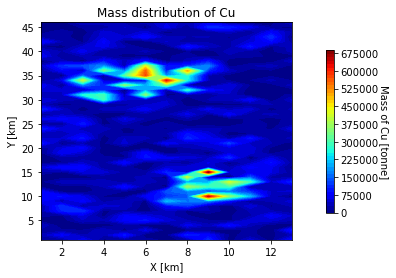

In [14]:
%matplotlib inline
#Magic command for Jupyter notebooks - the plot will be drawn in the document, rather than opening a separate window for it.
#If you want the plot to be interactive (zoom, hover, etc), use "%matplotlib notebook" instead 

import matplotlib.pyplot as plt 
fig, ax = plt.subplots() # Create figure and plot, so you can refer to the plot (ax) later

# See how to plot contour plots at https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html
#We will use the colourmap 'jet'. there are many other colourmaps available, such as 
# 'bone', 'jet', 'ocean' etc: https://matplotlib.org/stable/tutorials/colors/colormaps.html

heatmap = ax.contourf(x2D, y2D, Mwell2D, cmap='jet',levels=50) # Create the heatmap of the Cu mass, using the "jet" colormap and 50 contour levels
cbar = plt.colorbar(heatmap, orientation="vertical",shrink=0.75, pad=0.1) #Add colourbar; "pad" defines the distance from the plot measured asthe fraction of the plot axes. 
cbar.set_label('Mass of Cu [tonne]', rotation=270, labelpad=10 ) #Add the label and rotate it for 270 degrees; labelpad defines the distance from the colourbar
ax.set_title('Mass distribution of Cu') # Image title
ax.set_xlabel('X [km]') #X-axis label
ax.set_ylabel('Y [km]') # Y-axis label

Last two things:
* add a red rectangle where the mine is supposed to be
* change the aspect ratio of the plot so the x and y coordinates have the same scale

*Hint: use <a href="https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image" target="_blank">this forum</a> to see how to do add a rectangle to the plot and <a href="https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib" target="_blank">this one</a> to see how to plot the axes at the same scale. Always browse for the simplest answer. Refresh the figure by typing `fig`.* 

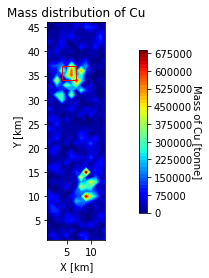

In [15]:
import matplotlib.patches as patches
# Create a Rectangle patch
rect = patches.Rectangle((4, 34), 3, 3, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

#Same scale for both axes
ax.set_aspect('equal')
fig

And we are done! 

Just a few advices for the end:
* If you get another dataset and need to perform the same task, the only thing you need to change is the link to the input data, the rest is done automatically within seconds.

* As mentioned before, it is very useful to write scripts (the example of the tasks accomplished in this notebook by a script is given in "CopperMine_exercise.py") 

* It is a good habit to write the data input and data analysis parts as separate functiones (modules). In this way you can, for example, combine the module for reading the data with different modules for data analysis. This gives you a flexibility and imporves performance, especially if you often deal with the same type of datasets/input files, for which you need to perform different data analisys tasks.

* A great resource for beginner: https://www.w3schools.com/python/